In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm.notebook import tqdm, trange

In [4]:
def get_path(seed=1492, N=10, xlimit=(-5,3), linea='o--', direcciones=10):
    angulo = 360/direcciones

    np.random.seed(seed)
    nums = [np.random.randint(direcciones) for i in range(N)]
    
    angulos = [(x*angulo)*math.pi/180 for x in nums]
    x_coor = [math.cos(angulo) for angulo in angulos]
    y_coor = [math.sin(angulo) for angulo in angulos]
    c_x = [0.]
    c_y = [0.]
    for x, y in zip(x_coor, y_coor):
        c_x.append(c_x[-1] + x)
        c_y.append(c_y[-1] + y)
        
    plt.plot(c_x, c_y, linea)
    plt.xlim(xlimit)

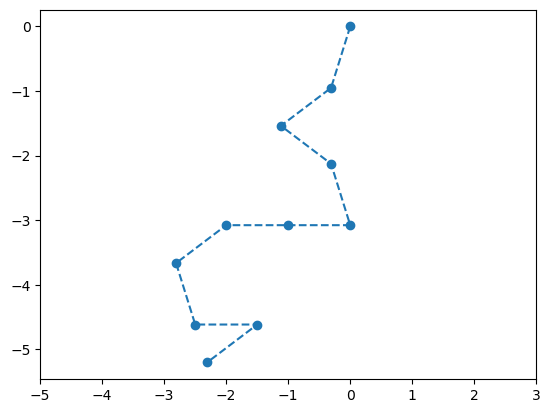

In [5]:
# Con 10 pasos
get_path()

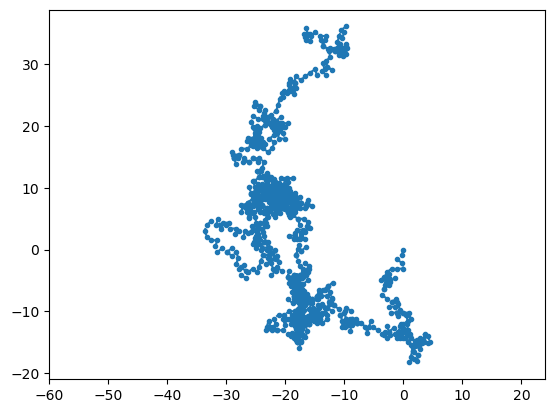

In [6]:
# Con 1000 pasos
get_path(N=1000, xlimit=(-60,24), linea='.--')

In [8]:
def get_path_origin(N=10, direcciones=10):
    angulo = 360/direcciones
    nums = [np.random.randint(direcciones) for i in range(N)]
    
    angulos = [(x*angulo)*math.pi/180 for x in nums]
    x_coor = [math.cos(angulo) for angulo in angulos]
    y_coor = [math.sin(angulo) for angulo in angulos]
    c_x, c_y = [0.], [0.]
    
    for x, y in zip(x_coor, y_coor):
        c_x.append(c_x[-1] + x)
        c_y.append(c_y[-1] + y)
    
    c_x_r,c_y_r = np.round(c_x, 2), np.round(c_y, 2)
    x_0, y_0 = np.where(c_x_r == 0.0)[0], np.where(c_y_r == 0.0)[0]

    origenes = []
    for x, y in zip(x_0, y_0):
        if x == y:
            origenes.append(x)

    return origenes
    

In [14]:
probabilidad = []
regresa = []
for direcciones in trange(2, 13):
    print(str(direcciones)+": ", end= ' ')
    for i in range(500):
        origenes = get_path_origin( N=500, direcciones=direcciones)
        r = any(origenes)
        if r:
             print(i, end=' ')
        regresa.append(r)
    probabilidad.append((direcciones, np.where(regresa)[0]/500))
    print()
probabilidad

  0%|          | 0/11 [00:00<?, ?it/s]

2:  
3:  19 48 63 81 82 87 89 92 95 99 104 105 118 121 122 130 137 145 148 149 151 156 158 160 172 175 177 189 211 214 233 234 252 255 265 269 272 276 281 283 284 297 304 311 320 326 333 346 360 365 367 377 379 398 399 403 409 411 418 421 423 427 434 456 457 474 488 489 499 
4:  7 14 23 41 80 86 100 102 107 114 131 135 138 167 172 174 181 191 196 210 220 226 241 246 254 266 271 275 282 284 285 290 291 297 298 303 312 320 325 326 329 330 338 342 348 353 366 379 384 389 390 391 397 398 399 400 413 415 421 422 428 438 446 450 
5:  308 356 388 421 
6:  2 11 13 30 34 35 40 54 55 59 71 72 73 74 77 85 86 90 92 94 97 98 99 100 104 123 126 129 148 149 152 153 160 166 168 172 180 183 189 192 201 204 206 210 217 218 223 224 228 235 253 256 259 269 275 279 281 285 289 294 301 308 312 314 315 317 320 321 324 326 339 341 346 363 365 368 369 372 373 378 379 380 381 385 390 392 403 404 406 418 421 429 434 441 452 465 471 485 486 488 489 491 493 494 
7:  79 
8:  27 34 35 49 95 97 100 109 126 131 161 16

[(2, array([], dtype=float64)),
 (3,
  array([1.038, 1.096, 1.126, 1.162, 1.164, 1.174, 1.178, 1.184, 1.19 ,
         1.198, 1.208, 1.21 , 1.236, 1.242, 1.244, 1.26 , 1.274, 1.29 ,
         1.296, 1.298, 1.302, 1.312, 1.316, 1.32 , 1.344, 1.35 , 1.354,
         1.378, 1.422, 1.428, 1.466, 1.468, 1.504, 1.51 , 1.53 , 1.538,
         1.544, 1.552, 1.562, 1.566, 1.568, 1.594, 1.608, 1.622, 1.64 ,
         1.652, 1.666, 1.692, 1.72 , 1.73 , 1.734, 1.754, 1.758, 1.796,
         1.798, 1.806, 1.818, 1.822, 1.836, 1.842, 1.846, 1.854, 1.868,
         1.912, 1.914, 1.948, 1.976, 1.978, 1.998])),
 (4,
  array([1.038, 1.096, 1.126, 1.162, 1.164, 1.174, 1.178, 1.184, 1.19 ,
         1.198, 1.208, 1.21 , 1.236, 1.242, 1.244, 1.26 , 1.274, 1.29 ,
         1.296, 1.298, 1.302, 1.312, 1.316, 1.32 , 1.344, 1.35 , 1.354,
         1.378, 1.422, 1.428, 1.466, 1.468, 1.504, 1.51 , 1.53 , 1.538,
         1.544, 1.552, 1.562, 1.566, 1.568, 1.594, 1.608, 1.622, 1.64 ,
         1.652, 1.666, 1.692, 1.72 , 1.7

In [22]:
len(probabilidad[3][1])/500

0.274

In [172]:
def get_origin_probability(iteraciones=1000, pasos = 100000):
    llego=[]
    for _ in trange(iteraciones):

        nums = [np.random.randint(10) for i in range(pasos)]
        angulos = [(x*36)*math.pi/180 for x in nums]
        
        x_coor = [math.cos(angulo) for angulo in angulos]
        y_coor = [math.sin(angulo) for angulo in angulos]
        c_x = [0.]
        c_y = [0.]
        for x, y in zip(x_coor, y_coor):
            c_x.append(c_x[-1] + x)
            c_y.append(c_y[-1] + y)
        c_x_r = np.round(c_x, 4)
        c_y_r = np.round(c_y, 4)

        x_0, y_0 = np.where(c_x_r == 0.0)[0], np.where(c_y_r == 0.0)[0]

        origenes = []
        for x, y in zip(x_0, y_0):
            if x == y:
                origenes.append(x)

        llego.append(any(origenes))

    return len(np.where(llego)[0])/iteraciones

In [173]:
probabilidades = []
for pasos in tqdm([1000, 50000, 100000, 200000]):
    for iteraciones in tqdm([100, 5000, 10000]):
        print(f'Pasos: {pasos}, Iteraciones: {iteraciones}', end=' ')
        probabilidad = get_origin_probability(pasos=pasos, iteraciones=iteraciones)
        print(f'Probabilidad: {probabilidad}')
        probabilidades.append(probabilidad)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Pasos: 1000, Iteraciones: 100 

  0%|          | 0/100 [00:00<?, ?it/s]

Probabilidad: 0.13
Pasos: 1000, Iteraciones: 5000 

  0%|          | 0/5000 [00:00<?, ?it/s]

Probabilidad: 0.0998
Pasos: 1000, Iteraciones: 10000 

  0%|          | 0/10000 [00:00<?, ?it/s]

Probabilidad: 0.0975


  0%|          | 0/3 [00:00<?, ?it/s]

Pasos: 50000, Iteraciones: 100 

  0%|          | 0/100 [00:00<?, ?it/s]

Probabilidad: 0.08
Pasos: 50000, Iteraciones: 5000 

  0%|          | 0/5000 [00:00<?, ?it/s]

Probabilidad: 0.092
Pasos: 50000, Iteraciones: 10000 

  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 